# 산업정보화_기말_성시열_12180626_대체과제

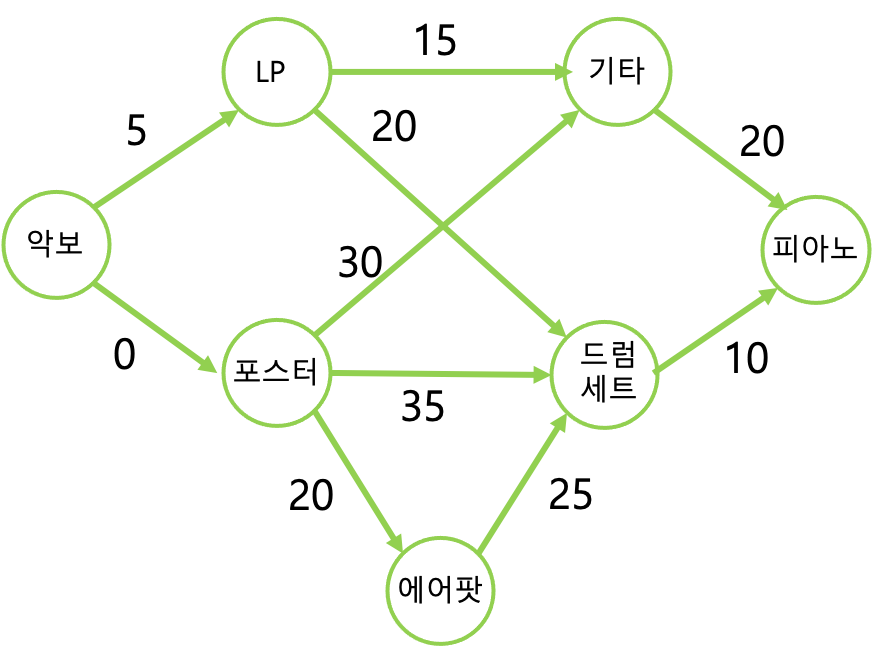

# 0. 위의 그래프를 다익스트라 알고리즘으로 구현하기 위해서 해시 테이블로 생성 하는 것..
## `graph`, `costs`, `parents` 

In [1]:
#graph
graph={"악보":{"LP":5, "포스터":0},
       "LP":{"기타":15, "드럼세트":20},
       "포스터":{"기타":30, "드럼세트":35, "에어팟":20},
       "기타":{"피아노":20},
       "드럼세트":{"피아노":10},
       "에어팟":{"드럼세트":25},
       "피아노":{}}

graph

{'악보': {'LP': 5, '포스터': 0},
 'LP': {'기타': 15, '드럼세트': 20},
 '포스터': {'기타': 30, '드럼세트': 35, '에어팟': 20},
 '기타': {'피아노': 20},
 '드럼세트': {'피아노': 10},
 '에어팟': {'드럼세트': 25},
 '피아노': {}}

In [2]:
#costs
costs = {i:float("inf") for i in graph}
costs["LP"] = 5
costs["포스터"] = 0
del costs["악보"]

costs

{'LP': 5, '포스터': 0, '기타': inf, '드럼세트': inf, '에어팟': inf, '피아노': inf}

In [3]:
#parents
parents = {i : None for i in costs}
parents["LP"] = "악보"
parents["포스터"] = "악보"

parents

{'LP': '악보', '포스터': '악보', '기타': None, '드럼세트': None, '에어팟': None, '피아노': None}

# 1. 다익스트라 알고리즘을 구현하고, 
# 1.1 `dijkstra(graph, start, final):` <- 이 함수를 생성
## '악보' -> '피아노' 까지 가는 최단 경로와 비용을 계산 
## 1.2 `dijkstra(graph,'악보','피아노')` <- 실행
## 결과 값으로, `비용`과 `해당 경로`가 나오기 ex) '악보'-> '드럼세트' ->'피아노', 비용 45

In [4]:
processed = []
def find_lowest_cost_node(costs):
    lowest_cost = float("inf")
    lowest_cost_node = None
    for node in costs:        
        cost = costs[node]     
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost  
            lowest_cost_node = node 
    return lowest_cost_node

#1.1 dijkstra(graph, start, final) 생성
def dijkstra(graph, start, final):
    node = find_lowest_cost_node(costs)   
    while node is not None: 
        cost = costs[node]
        neighbors = graph[node]
        for n in neighbors.keys():     
            new_cost = cost + neighbors[n]
            if costs[n] > new_cost:    
                costs[n] = new_cost    
                parents[n] = node     
        processed.append(node)         
        node = find_lowest_cost_node(costs)
        
    # 경로 계산
    path = []
    current_node = final
    while current_node != start:
        path.append(current_node)
        next_node = parents[current_node]
        current_node = next_node
    path.append(start)
    path.reverse()
    print("최단경로:"," -> ".join(path))
    print("비용:",costs[final])

In [5]:
#1.2 '악보' -> '피아노' 까지 가는 최단 경로와 비용을 계산
#dijkstra(graph,'악보','피아노') 실행

dijkstra(graph,'악보','피아노')

최단경로: 악보 -> LP -> 드럼세트 -> 피아노
비용: 35


# 2. 너비우선탐색(BFS) 알고리즘으로 위의 문제를 풀어볼 수 있어요.

## 다익스트라 알고리즘은 가중치가 있는 그래프에서 최단경로를 계산하는 방법이에요.
## 너비우선탐색은 가중치가 없는 그래프에서 최단경로를 계산하는 방법이었어요.
## 너비우선탐색알고리즘으로 위의 가중치가 있는 그래프의 최단경로를 계산할 수 있어요 (경로와 비용을) 모든 경우의 경로를 계산하고 추후에 비용을 비교하는거죠.

## 2.1 `bfs(graph, start, final):` 생성
## 2.2 `bfs(graph, '악보','피아노')` 호출
## 2.3 결과값으로는 `비용`과 `해당 경로`가 나오기 but 전체 악보에서 피아노까지의 모든 경로를 도출한 다음 각각의 경로의 비용을 해시테이블로 호출하여 계산하고, 가장 값이 작은 경로가 최단 경로

### ex) 최단 경로 : sheet_music, LP, drum_set, piano , 최소 비용 : 35
### {'sheet_music, LP, guitar, piano': 40,
### 'sheet_music, LP, drum_set, piano': 35,
### 'sheet_music, poster, guitar, piano': 50,
### 'sheet_music, poster, drum_set, piano': 45}

In [6]:
from collections import deque

# 2.1 bfs 생성
def bfs(graph, start, final):
    search_queue = deque()
    search_queue.append([start])
    result_paths = []
    while search_queue:
        path = search_queue.popleft()
        node = path[-1]
        if node == final:
            result_paths.append(path)
        for adjacent in graph.get(node,[]):
            new_path = path[:]
            new_path.append(adjacent)
            search_queue.append(new_path)
        
    if result_paths == []:
        return "no path"
    
    # 경로마다 비용계산
    result_costs = []
    for nodes in result_paths:
        cost = 0
        for idx in range(len(nodes)-1):
            node = nodes[idx]
            next_node = nodes[idx+1]
            cost = cost + graph[node][next_node]
        result_costs.append(cost)
        
    # 최단경로 도출
    lowest_cost = min(result_costs)
    shortest_path = ""
    
    for p,c in zip(result_paths, result_costs):
        print("경로:"," -> ".join(p),"/","비용:",c)
        if c == lowest_cost:
            shortest_path = p
    print("\n최단경로:",", ".join(shortest_path), ", 최소비용:",lowest_cost)    

In [7]:
bfs(graph,'악보','피아노')

경로: 악보 -> LP -> 기타 -> 피아노 / 비용: 40
경로: 악보 -> LP -> 드럼세트 -> 피아노 / 비용: 35
경로: 악보 -> 포스터 -> 기타 -> 피아노 / 비용: 50
경로: 악보 -> 포스터 -> 드럼세트 -> 피아노 / 비용: 45
경로: 악보 -> 포스터 -> 에어팟 -> 드럼세트 -> 피아노 / 비용: 55

최단경로: 악보, LP, 드럼세트, 피아노 , 최소비용: 35


# 3. 탐욕적 기법을 이용해서 문제를 풀어봐요.

## 3.1 `greedy(graph,start,final):` 함수 생성
## 3.2 `greedy(graph, '악보','피아노')` 함수 호출
## 3.3 결과값으로 `경로와 해당 경로의 비용`이 도출

In [8]:
def greedy(graph,start,final):
    cost = 0
    node = start
    path = [start]
    while node != final:
        neighbor = graph[node]
        selected = min(neighbor, key = lambda k:neighbor[k])
        cost = cost + neighbor[selected]
        node = selected
        path.append(selected)
    
    print("경로 :"," -> ".join(path))
    print("해당 경로의 비용 :",cost)

In [9]:
greedy(graph,'악보','피아노')

경로 : 악보 -> 포스터 -> 에어팟 -> 드럼세트 -> 피아노
해당 경로의 비용 : 55


# 4. 배낭 채우기 문제(물건 쪼갤 수 없음, 1-0)를 탐욕적 기법으로 해를 구해보고, 동적 프로그래밍으로 계산한 해와 비교해보자. 

|수확물|A|B|C|D|E|F|G|
|---|---|---|---|---|---|---|---|
|가치|10|5|15|7|6|18|3|
|무게|2|3|5|7|1|4|1|


- `W`는 `15`
## 4.1 `greedy_knapsack`함수와 `dynamic_kanpsack`함수를 각각 구현하고, 각각의 해를 비교해서 결과를 논의해보시오. (두개의 함수가 답안지에 작성 되어 있어야 함)
## 4.2 `dynamic_kanpsack` 함수에서 배낭안의 물건종류를 리턴하는 것을 구현하기 힘들면, 그리드를 직접 그려서 이를 이용하여 서술하셔도 됩니다. 

In [10]:
val = [('A',10),('B',5),('C',15),('D',7),('E',6),('F',18),('G',3)] #수확물 가치
wt = {'A':2,'B':3,'C':5,'D':7,'E':1,'F':4,'G':1}                   #수확물 무게
W = 15                                                             #배낭 속 용량

In [11]:
#탐욕적 기법을 활용한 해
def greedy_knapsack(W, wt,val): # 배낭 속 용량, 수확물 무게, 수확물 가치를 parameter로 받음.
    # 초기 조건 설정
    knapsack = [] 
    weight = 0
    value = 0
    
    while weight < W:    # (수확물 총 무게 < 배낭 속 용량) 일 때 아래 실행문 반복.
        selected = max(val, key=lambda item:item[1]) #선택된 수화물이 저장된 selected를 설정
        item = selected[0]    #selected의 첫 번째 값을 item에 넣어주고
        i = val.index(selected) #수확물 가치의 인덱스를 i로 저장

        if wt[item] < W - weight:  #위의 과정을 하고난 뒤 수확물의 무게가 배낭 속 남은 용량보다 작다면
            knapsack.append(selected[0]) #knapsack에 selected 첫번째 값을 추가.
            weight += wt[item]    #총 무게를 수확물의 무게만큼 늘려줌.
            value += selected[1]  #총 가치를 수확물의 가치만큼 늘려줌.
        del val[i]    #수확물 가치가 저장된 인덱스를 제거함.
        
        if len(val) == 0:  #위의 del val[i]과정을 통해 val의 값이 모두 제거(길이가 0)이 되면
            break          #반복문을 빠져나온다.
    print(f"선택한 수확물 : {knapsack}")
    print(f"배낭 속 무게 : {weight}")
    print(f"배낭 속 수확물의 가치 : {value}")

In [12]:
greedy_knapsack(W, wt,val)

선택한 수확물 : ['F', 'C', 'A', 'E', 'G']
배낭 속 무게 : 13
배낭 속 수확물의 가치 : 52


In [13]:
#dynamic_kanpsack 동적프로그래밍
def dynamic_knapsack(W,wt,val,n):
    
    # 그리드 K 생성
    K = [[0 for x in range(W+1)] for x in range(n+1)]
    # 그리드 K[][]에 값을 생성, bottom-up manner
    for i in range(n+1):         # 행, n = 7;  0,1,2,3,4,5,6,7
        for w in range(W+1):     # 열, W = 15; 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
            if i == 0 or w == 0:     # 초기값
                K[i][w] = 0
            elif wt[i-1] <= w:   # 현재의 물건을 해당 칸의 무게 에 넣을 수 있으면?
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
            else:                # 물건을 현재의 w(그리드 무게)에 넣지 못하면?
                K[i][w] = K[i-1][w]
        
    return K[n][W]

In [14]:
#위의 표 정보를 활용하기 위해 변수에 저장
item = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
val = [10, 5, 15, 7, 6, 18, 3]
wt =[2, 3, 5, 7, 1, 4, 1]
W = 15
n = len(val)

In [15]:
print(f"배낭 속 수확물의 가치 : {dynamic_knapsack(W,wt,val,n)}")

배낭 속 수확물의 가치 : 54


## 4-2 그리드

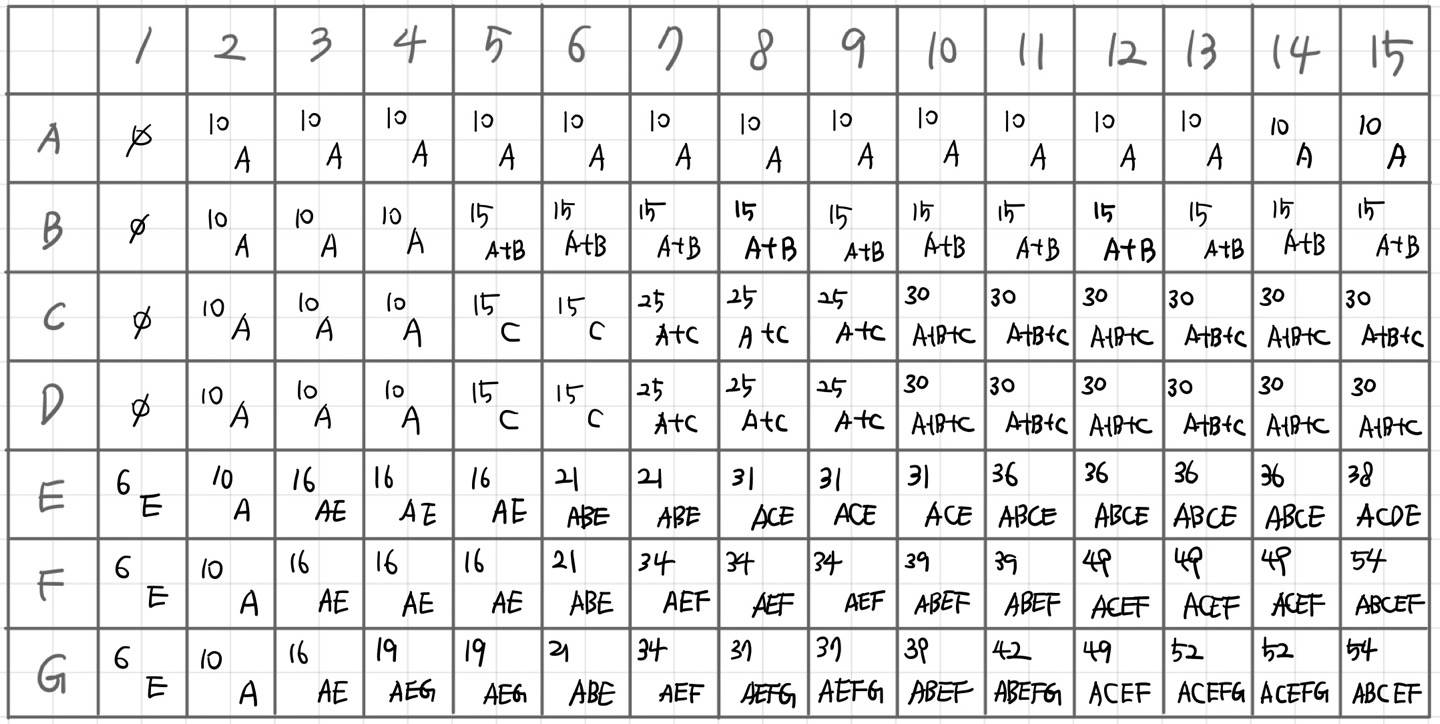

그리드를 그려 동적프로그래밍의 해를 직접 구하면 위와 같습니다.

열은 배낭의 용량을 1부터 15까지 나누고

행은 수확물을 나열합니다.

첫 행부터 가장 가치가 높은 수확물 조합을 배낭에 채우는데

채우는 행보다 아래에 있는 수확물은 사용하지 않습니다.

그렇게 한 행씩 채우다보면 마지막 행, 마지막 열의 셀이 최적해가 됩니다.

#### 동적프로그래밍 최적해

선택한 수확물 : A, B, C, E, F

배낭 속 수확물의 가치 : 54

배낭 속 무게 : 15

#### 각각의 해를 비교해서 결과를 논의해보시오.

탐욕적 기법을 활용하여 구한 총 가치는 52인데 이 기법은 최적해를 찾는 기법이 아닙니다. 이에 대한 근거로 배낭 속 용량이 15임에도 배낭 속 무게가 13인 것을 보면 최적해가 아니라는 것을 알려줍니다. 이러한 점을 보완한 기법이 동적프로그래밍인데 이를 통해 구한 총 가치는 54임을 알 수 있습니다.